## Predicting the players subscription pattern uning KNN Classification Model.

**Group Member**
1. Jenny Gao 
2. Sai Sriman
3. Maya Kosciolek
4. Colleen Tran

#### Introduction

Recent interest in player behaviour within virtual environments has driven gaming companies and researchers to collect and analyze interactions to better the experience of a player and optimize the environment to suit the player's interests. A research group at UBC, led by Dr. Frank Wood, collected player data from a custom Minecraft environment, focusing on factors like engagement, time spent, and age. One important factor of engagement is whether a player subscribes to the game's newsletter. 

The project aims to answer the broad question: `What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?` for our analysis. 

Our specific question is: `Can the hours played and the age of the player predict whether a minecraft player subscribes to the games newsletter`

For this analysis, we are going to use the `players` dataset. This dataset contains information such as age, hours played, a unique email code, and more (refer to table below). 

The primary predictor variables are Age and Played hours, while the variable of interest is the Subscribed column, a boolean indicating newsletter subscription status. 

In [20]:

library(tidyverse)
library(tidymodels)

The data set `players` can be viewed below:

In [21]:
players_data <- read_csv("https://raw.githubusercontent.com/saisriman2004/DSCI_V-100-Group-Project/refs/heads/main/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


The dataset was then wrangled to only include columns that are relevant to our question (Age, subscribe and played_hours).

### Dataset Description

For this analysis, we are going to use the `players` dataset. This dataset contains information such as age, hours played, a unique email code, and more (refer to table below). 

| Variable | Type | Meaning |
|------------|------|---------|
| experience | string | Playing experience (pro, amateur, veteran, regular, beginner)|
| gender| string | Gender of player|
|subscribe| logical| Player is either subscribed to newsletter or not (true/false)|
| hashedEmail|character|Email used by player|
|name|character|Name of user|
|age|double|Age of player (years)|
|played_hours|double|Total hours played by player|

In [22]:
players <- players_data |>
    summarize(subscribe, Age, played_hours)
head(players)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


subscribe,Age,played_hours
<lgl>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0


In [23]:
players |> count(subscribe)

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


- Most players are subscribed. A total of 144 out of 196. This means the target variable is unbalanced, since there are more subscribers than non-subscribers.

In [24]:
players |>
 summarize(
    avg_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    avg_played = round(mean(played_hours, na.rm = TRUE), 2),
    min_played = min(played_hours, na.rm = TRUE),
    max_played = max(played_hours, na.rm = TRUE)
  )
players_data_cleaned<-players_data|>
        drop_na(Age, played_hours, subscribe) |>
          mutate(subscribe = as_factor(subscribe))

avg_age,min_age,max_age,avg_played,min_played,max_played
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,58,5.85,0,223.1


- The summarized results show that players are fairly young overall, with an average age of about 21.14 years and ages ranging from 9 to 58.
- Playtime varies widely: the average number of hours played is 5.85, but some players have not played at all (0 hours) while others have played up to 223.1 hours, indicating a large difference in engagement.

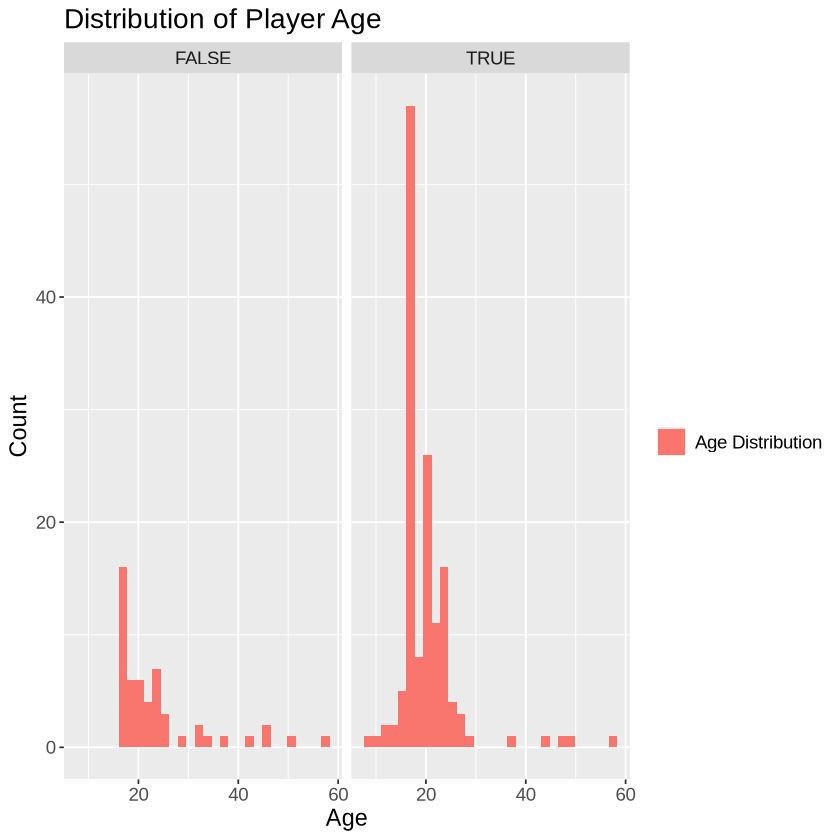

In [25]:
players_data_cleaned|>
  ggplot(aes(x = Age, fill = "Age Distribution")) +
  geom_histogram(bins = 30, alpha = 1) +
  labs(
    title = "Distribution of Player Age",
    x = "Age",
    y = "Count",
    fill = ""
  )+
  theme(text = element_text(size = 14))+ facet_grid(cols= vars(subscribe))

- As we can see from the histogram, seperated by face_grid to show the difference of age between those who Subscribed or not.
- The TRUE group is composed a large number of younger players clustered around ages 18–25, while the FALSE group contains fewer players and a much wider, older age range.
- In addition the counts in the TRUE panel are much higher, there is one bar reaching 40+, meaning there are more subscribed players than not subscribed.

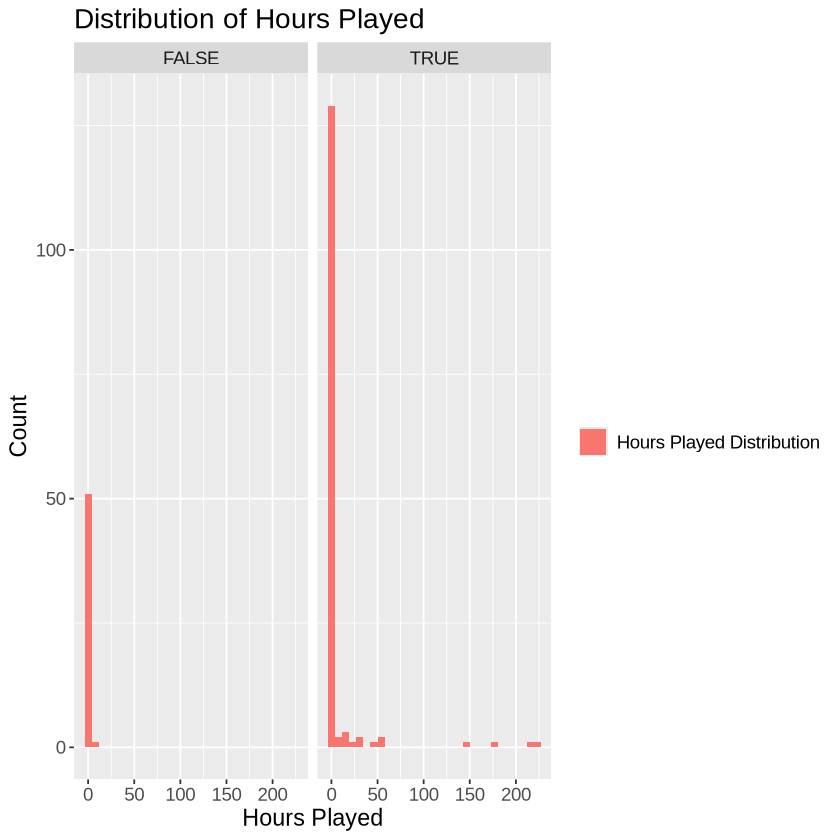

In [26]:
players |>
  ggplot(aes(x = played_hours, fill = "Hours Played Distribution")) +
  geom_histogram(bins = 30, alpha = 1) +
  labs(
    title = "Distribution of Hours Played",
    x = "Hours Played",
    y = "Count",
    fill = ""
  )+
  theme(text = element_text(size = 14))+ facet_grid(cols= vars(subscribe))

- The histogram of the distribution of hours played, seperated by Subscribe shows that the TRUE group has a huge concentration of numbers around 0–15 hours and several players even played for 100–200 hours.
- The FALSE group mostly has very low hours, heavily clustered near 0–10 hours.
- Both of the histogram is heavily right-skewed. 
- From this we can conclude that the TRUE group apprears to be far more engaged overall. 

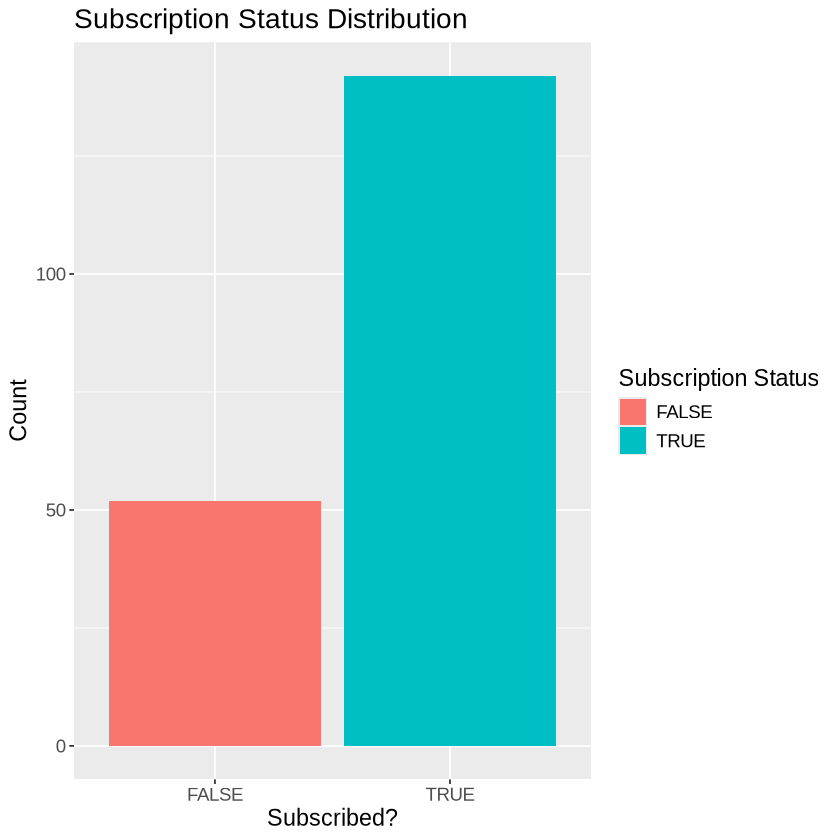

In [27]:
players_data_cleaned |>
  ggplot(aes(x = subscribe, fill = factor(subscribe))) +
  geom_bar() +
  labs(
    title = "Subscription Status Distribution",
    x = "Subscribed?",
    y = "Count",
    fill = "Subscription Status"
  ) +
theme(text = element_text(size = 14))

- The bar chart above shows that far more users are subscribed than not subscribed. The TRUE bar is much higher, indicating more people subscribed. Also from the count subscribe table earlier, a total of 144 out of 196 person subscribed.

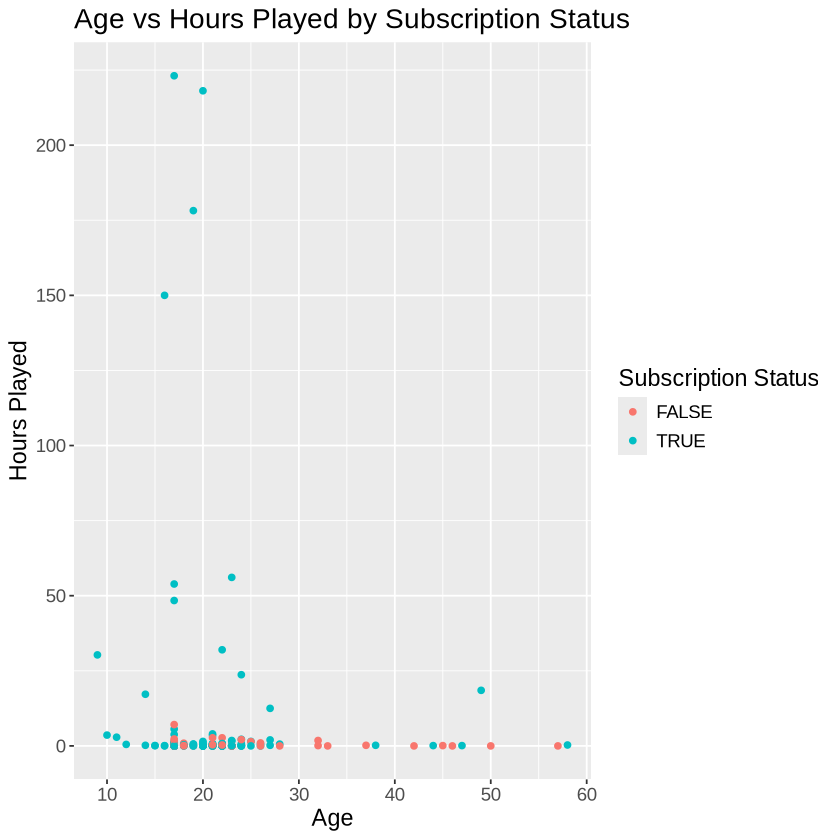

In [28]:
players_data_cleaned |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(
    title = "Age vs Hours Played by Subscription Status",
    x = "Age",
    y = "Hours Played",
    color = "Subscription Status"
  )+
 theme(text = element_text(size = 14))

- The scatterplot shows the relationship between age and hours played, separated by subscription status. We can see that younger players, like teenagers tend to play the most hours, while older players play very little hours. Subscribed players generally appear in the higher-hours area, suggesting subscription may be linked to heavier play time. 

In [29]:
players_data_cleaned<-players_data|>
        drop_na(Age, played_hours, subscribe) |>
          mutate(subscribe = as_factor(subscribe))

In [30]:
head(players_data_cleaned)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Now that the data has been explored using visualizations and summarized results, the model is built and we set the seed so the results are reproducible.

- The dataset is split into a training set and a testing set.We are going to train our `KNN Classification` model using our training split data and then validate it against our testing data, which provides a reliable estimate as to how well the trained model works on the data it hasn't seen before 
- A recipe is created to preprocess the data and model is trained using the training dataset, and V-fold cross validation is used  to calculate the best model accuracy accross  a range of K values.
- The K value with the highest cross validation accuracy is the K value we use for the actual final model

In [47]:
set.seed(1234)
players_split<-initial_split(players_data_cleaned,prop=0.75,strata=subscribe)
training_data<-training(players_split)
testing_data<-testing(players_split)
head(training_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Veteran,FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,1.4,Aiden,Prefer not to say,25


In [48]:
head(testing_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17


In [49]:
players_recipe<-recipe(subscribe ~ Age +played_hours,data = training_data) |>
            step_center(all_predictors()) |>
            step_scale(all_predictors())


In [50]:
set.seed(123)

In [51]:
players_spec_tuned<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
players_spec_tuned

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [52]:
set.seed(123)

k_vals<-tibble(neighbors=seq(from=1,to=20,by=1))

In [53]:
set.seed(123)
players_vfold<-vfold_cv(training_data,v=5,strata=subscribe)
player_knn_results<-workflow() |>
               add_recipe(players_recipe) |>
               add_model(players_spec_tuned) |>
               tune_grid(resamples = players_vfold, grid = k_vals) |>
               collect_metrics()
head(player_knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4608210,5,0.05333534,Preprocessor1_Model01
1,roc_auc,binary,0.4986472,5,0.06561730,Preprocessor1_Model01
2,accuracy,binary,0.4470115,5,0.05934820,Preprocessor1_Model02
2,roc_auc,binary,0.4824018,5,0.05559924,Preprocessor1_Model02
3,accuracy,binary,0.5510016,5,0.04009305,Preprocessor1_Model03
3,roc_auc,binary,0.5229321,5,0.05661044,Preprocessor1_Model03


In [54]:
best_k<-player_knn_results|>
        filter(.metric == "accuracy")|>
        arrange(desc(mean))|>
        slice(1)

In [55]:
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
18,accuracy,binary,0.7585222,5,0.01553123,Preprocessor1_Model18


In [56]:
final_spec_tuned<-nearest_neighbor(weight_func="rectangular",neighbors= 18)|>
                                set_engine("kknn") |>
                                set_mode("classification")

In [57]:
final_knn_fit<-workflow()|>
            add_recipe(players_recipe)|>
            add_model(final_spec_tuned)|>
            fit(data=training_data)

In [58]:
final_predictions<-predict(final_knn_fit,testing_data) |>
                bind_cols(testing_data)

In [59]:
final_pred_metrics<-metrics(final_predictions,truth=subscribe,estimate = .pred_class)
final_pred_metrics
final_pred_conf_mat<-conf_mat(final_predictions,truth=subscribe,estimate=.pred_class)
final_pred_conf_mat
final_pred_recall<-recall(final_predictions,truth=subscribe,estimate = .pred_class,event_level="second")
final_pred_recall
final_pred_precision<-precision(final_predictions,truth=subscribe,estimate = .pred_class,event_level="second")
final_pred_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694
kap,binary,-0.1104816


          Truth
Prediction FALSE TRUE
     FALSE     0    3
     TRUE     13   33

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9166667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7173913


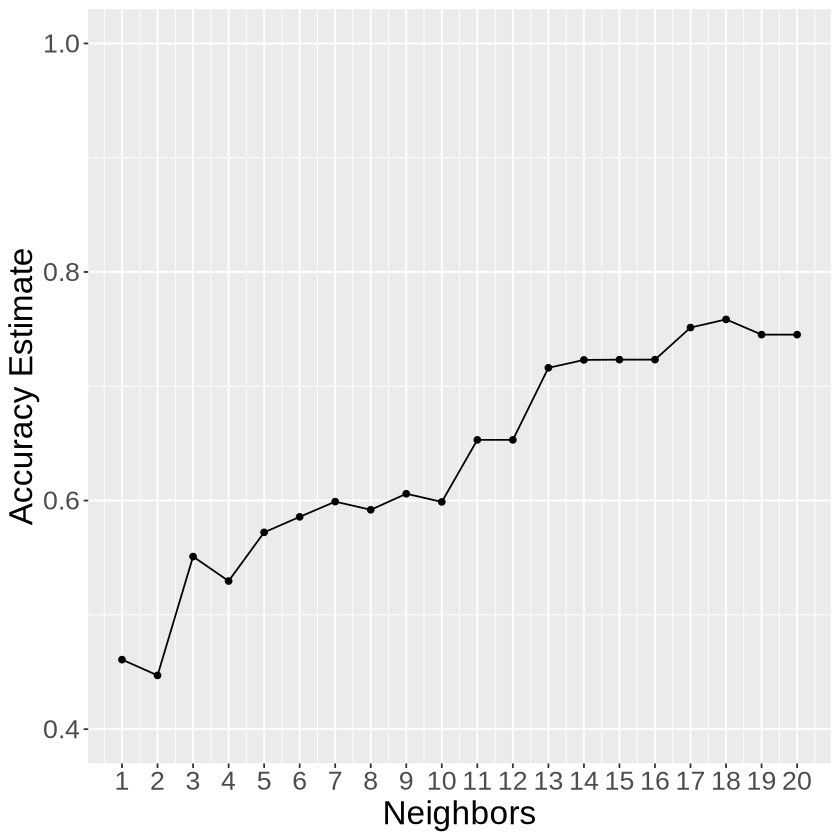

In [60]:
accuracies <- player_knn_results|>
        filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) +
                     scale_x_continuous(breaks = seq(0, 20, by = 1)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

Best neighbour: 18

Accuracy: 67%

Precision: 72%

Recall: 91%

**Discussion**

**Summarize what you found**

The initial exploratory data analysis revealed that the player base is relatively young, with an average age of a player being approximately 21 years old. However, the age range is wide, spanning from 9 to 58 years. Furthermore, player engagement which is measured by played hours, showed high variability, with an average of 5.85 hours but a maximum of 223.1 hours, indicating a mix of highly dedicated and casual users. The main idea of the project involved building a classification model to predict subscription status using columns from the dataset like age, played hours, and experience. A knn model was selected and tuned to find the optimal number of neighbors. 

**Discuss whether this is what you expected to find**

This is what we expected to find as a game with a younger player base with a high playtime is consistent with trends observed in the gaming industry. Most of the older players are occupied with more important things in their life such as having a full time job therefore trends point to younger players having a higher playtime. 

**Discuss what impact could such findings have**

The model allows the company to identify and target non-subscribing players who share similar characteristics (age, experience, etc.) with the current subscriber base. This helps with more efficient and personalized subscription ads/campaigns. Additionally, the model can help identify the players that are most likely to unsubscribe. By identifying this, companies can target these players and have specialized content. 

**Discuss what future questions could this lead to**

How do we address the data imbalance? The data was skewed heavily toward young players. How can we recruit a more diverse age range to see if trends emerge with a larger sample size of players over 30?

What are the in game metrics? Instead of Age/Hours, could variables like "blocks mined" or "enemies/mobs defeated" better predict a player's experience level?


#### References
 Refered to knn worksheets and tutorials for the process.